<a href="https://colab.research.google.com/github/bloodkalsura/Best-ML-Algorithm-For-CyberBullying/blob/main/Best_ML_Algorithm_For_CyberBullying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
from nltk.corpus import stopwords 
import string
data=pd.read_csv('public_data_labeled.csv')
df=pd.DataFrame(data)
df.head()

,label,full_text
0,Non-offensive,!!! RT @mayasolovely: As a woman you shouldn't...
1,Offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,Offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,Offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,Offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
df['label']=lr.fit_transform(df['label'])
df['label'].head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [6]:
x=df['full_text'][0]
x

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

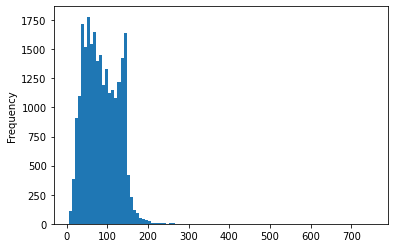

In [8]:
X=df['full_text'].apply(len)
X.plot.hist(bins=100)

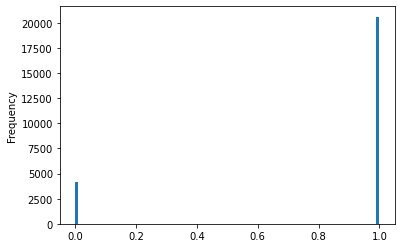

In [9]:
df['label'].plot.hist(bins=100)

In [10]:
def text_preprocessing(mess):
    nopunc=[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [11]:
df['full_text'].head().apply(text_preprocessing)

0    [RT, mayasolovely, woman, shouldnt, complain, ...
1    [RT, mleew17, boy, dats, coldtyga, dwn, bad, c...
2    [RT, UrKindOfBrand, Dawg, RT, 80sbaby4life, ev...
3      [RT, CGAnderson, vivabased, look, like, tranny]
4    [RT, ShenikaRoberts, shit, hear, might, true, ...
Name: full_text, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer 

In [13]:
count_vect=CountVectorizer(analyzer=text_preprocessing).fit(df['full_text'])
count_vect

CountVectorizer(analyzer=<function text_preprocessing at 0x7f5d72054170>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
tweet_bow=count_vect.transform(df['full_text'])
tweet_bow

<24783x45750 sparse matrix of type '<class 'numpy.int64'>'
	with 219896 stored elements in Compressed Sparse Row format>

In [15]:
from sklearn.feature_extraction.text import TfidfTransformer

In [16]:
tfidf_transformer=TfidfTransformer().fit(tweet_bow)
tfidf_transformer

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [17]:
tweet_tfidf=tfidf_transformer.transform(tweet_bow)
tweet_tfidf

<24783x45750 sparse matrix of type '<class 'numpy.float64'>'
	with 219896 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(tweet_tfidf,df['label'],test_size=0.1)

In [19]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
prediction=mnb.predict(x_test)
prediction[:50]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [21]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction)
acc

0.8600242033077854

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.14      0.24       400
           1       0.86      1.00      0.92      2079

    accuracy                           0.86      2479
   macro avg       0.91      0.57      0.58      2479
weighted avg       0.87      0.86      0.81      2479



In [23]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar=[accuracy_score(y_test, prediction),f1_score(y_test, prediction) ,recall_score(y_test, prediction) , precision_score(y_test, prediction)]
y_bar

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

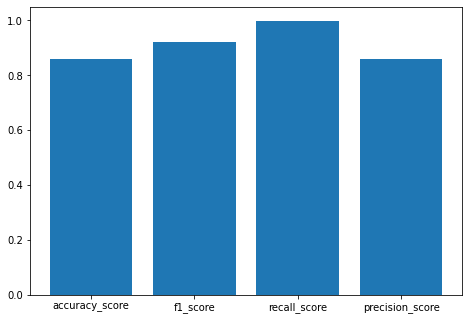

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar,x_bar)
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
prediction2=lm.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
acc2=accuracy_score(y_test,prediction2)
acc2

0.9298104074223478

In [28]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar2=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar2=[accuracy_score(y_test, prediction2),f1_score(y_test, prediction2) ,recall_score(y_test, prediction2) , precision_score(y_test, prediction2)]
y_bar2

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

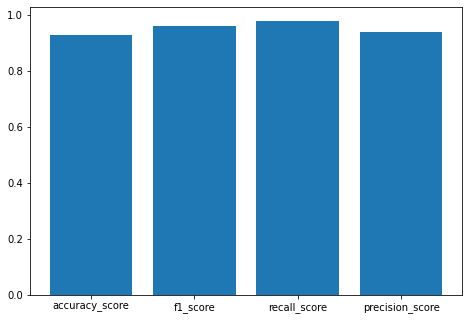

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar2,x_bar2)
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       400
           1       0.94      0.98      0.96      2079

    accuracy                           0.93      2479
   macro avg       0.90      0.82      0.86      2479
weighted avg       0.93      0.93      0.93      2479



In [31]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
prediction3=clf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,prediction3)
acc3

0.9427188382412263

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction3))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       400
           1       0.96      0.98      0.97      2079

    accuracy                           0.94      2479
   macro avg       0.91      0.87      0.89      2479
weighted avg       0.94      0.94      0.94      2479



In [35]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar3=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar3=[accuracy_score(y_test, prediction3),f1_score(y_test, prediction3) ,recall_score(y_test, prediction3) , precision_score(y_test, prediction3)]
y_bar3

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

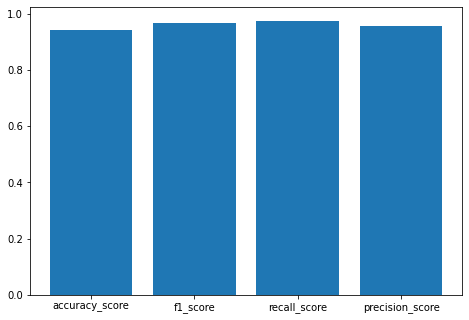

In [36]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar3,x_bar3)
plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [38]:
prediction4=neigh.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score
acc4=accuracy_score(y_test,prediction4)
acc4

0.8793868495361032

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction4))

              precision    recall  f1-score   support

           0       0.74      0.39      0.51       400
           1       0.89      0.97      0.93      2079

    accuracy                           0.88      2479
   macro avg       0.82      0.68      0.72      2479
weighted avg       0.87      0.88      0.86      2479



In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar4=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar4=[accuracy_score(y_test, prediction4),f1_score(y_test, prediction4) ,recall_score(y_test, prediction4) , precision_score(y_test, prediction4)]
y_bar4

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

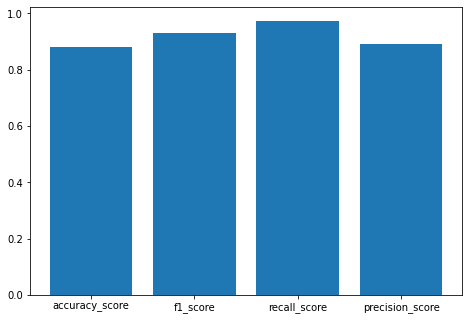

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar4,x_bar4)
plt.show()

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [44]:
prediction5=dtree.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
acc5=accuracy_score(y_test,prediction5)
acc5

0.9338442920532473

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction5))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       400
           1       0.97      0.95      0.96      2079

    accuracy                           0.93      2479
   macro avg       0.87      0.89      0.88      2479
weighted avg       0.94      0.93      0.93      2479



In [47]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar5=['accuracy_score', 'f1_score', 'recall_score', 'precision_score']
x_bar5=[accuracy_score(y_test, prediction5),f1_score(y_test, prediction5) ,recall_score(y_test, prediction5) , precision_score(y_test, prediction5)]
y_bar5

['accuracy_score', 'f1_score', 'recall_score', 'precision_score']

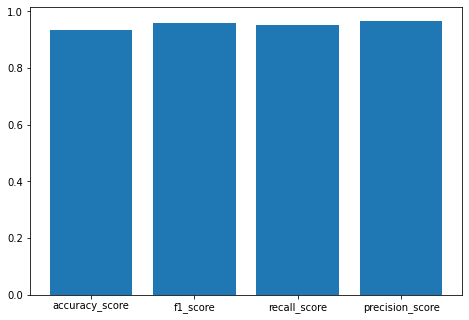

In [48]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar5,x_bar5)
plt.show()

In [49]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100, random_state=0)
adb.fit(x_test,y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [50]:
prediction6=adb.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score
acc6=accuracy_score(y_test,prediction6)
acc6

0.9673255344897136

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction6))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       400
           1       1.00      0.97      0.98      2079

    accuracy                           0.97      2479
   macro avg       0.92      0.97      0.94      2479
weighted avg       0.97      0.97      0.97      2479



In [53]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
y_bar6=['accuracy_score', 'f1_score', 'Decision Tree', 'precision_score']
x_bar6=[accuracy_score(y_test, prediction6),f1_score(y_test, prediction6) ,recall_score(y_test, prediction6) , precision_score(y_test, prediction6)]
y_bar6

['accuracy_score', 'f1_score', 'Decision Tree', 'precision_score']

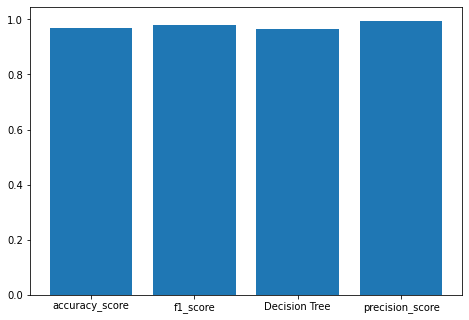

In [54]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(y_bar6,x_bar6)
plt.show()

In [55]:
y_mod=['MNB','Logistic Regression','SVM', 'KNN','Decsion Tree' ,'Ada Boost','LSTM']
x_acc=[acc,acc2,acc3,acc4,acc5,acc6,0.94]
x_acc

[0.8600242033077854,
 0.9298104074223478,
 0.9427188382412263,
 0.8793868495361032,
 0.9338442920532473,
 0.9673255344897136,
 0.94]

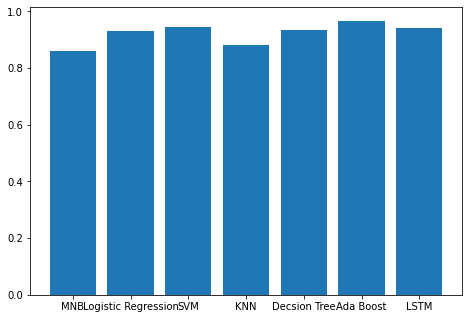

In [56]:
fig = plt.figure()
ax = fig.add_axes([5,0,1,1])
ax.bar(y_mod,x_acc)
plt.show()